# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
ride_count = pyber_data_df.groupby(by="type")["ride_id"].count()

In [4]:
# 2. Get the total drivers for each city type
driver_count = city_data_df.groupby(by="type")["driver_count"].sum()

In [5]:
#  3. Get the total amount of fares for each city type
fare_by_type = pyber_data_df.groupby(by="type")["fare"].sum()

In [6]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride = fare_by_type/pyber_data_df.groupby("type")["ride_id"].count()

In [7]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver = fare_by_type/city_data_df.groupby("type")["driver_count"].sum()

In [8]:
#  6. Create a PyBer summary DataFrame. 
#pyber_summary_df = pd.DataFrame(ride_count, river_count, fare_by_type, avg_fare_per_ride, avg_fare_per_driver)
#pyber_summary_df

In [9]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.concat([ride_count, driver_count, fare_by_type, avg_fare_per_ride, avg_fare_per_driver], axis=1)
pyber_summary_df.rename(columns={'ride_id': 'Total Rides', 'driver_count': 'Total Drivers', 'fare': 'Total Fare', 0 : 'Average Fare per Ride', 1 : 'Average Fare per Driver'}, inplace=True)

In [10]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [11]:
#  8. Format the columns.
pyber_summary_df['Total Rides'] = pyber_summary_df['Total Rides'].astype(int)
pyber_summary_df['Total Rides'] = pyber_summary_df['Total Rides'].map("{:,}".format)
pyber_summary_df['Total Drivers'] = pyber_summary_df['Total Drivers'].map("{:,}".format)
pyber_summary_df['Total Fare'] = pyber_summary_df['Total Fare'].map("${:,.2f}".format)
pyber_summary_df['Average Fare per Ride'] = pyber_summary_df['Average Fare per Ride'].map("${:,.2f}".format)
pyber_summary_df['Average Fare per Driver'] = pyber_summary_df['Average Fare per Driver'].map("${:,.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fare,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [12]:
# 1. Read the merged DataFrame
pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          2375 non-null   object 
 1   date          2375 non-null   object 
 2   fare          2375 non-null   float64
 3   ride_id       2375 non-null   int64  
 4   driver_count  2375 non-null   int64  
 5   type          2375 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 129.9+ KB


In [13]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fares_by_date_type = pyber_data_df.groupby(["type","date"])[["fare"]].sum()

In [14]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
fares_by_date_type = fares_by_date_type.reset_index()

In [15]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
date_pivot = fares_by_date_type.pivot(index='date', columns = 'type', values = 'fare')

In [16]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
date_pivot_sub = date_pivot.loc['2019-01-01':'2019-04-29']

In [17]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
date_pivot_sub.index = pd.to_datetime(date_pivot_sub.index)

In [18]:
# 7. Check that the datatype for the index is datetime using df.info()
date_pivot_sub.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [19]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
date_pivot_sub_week = date_pivot_sub.resample('w').sum()
date_pivot_sub_week.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


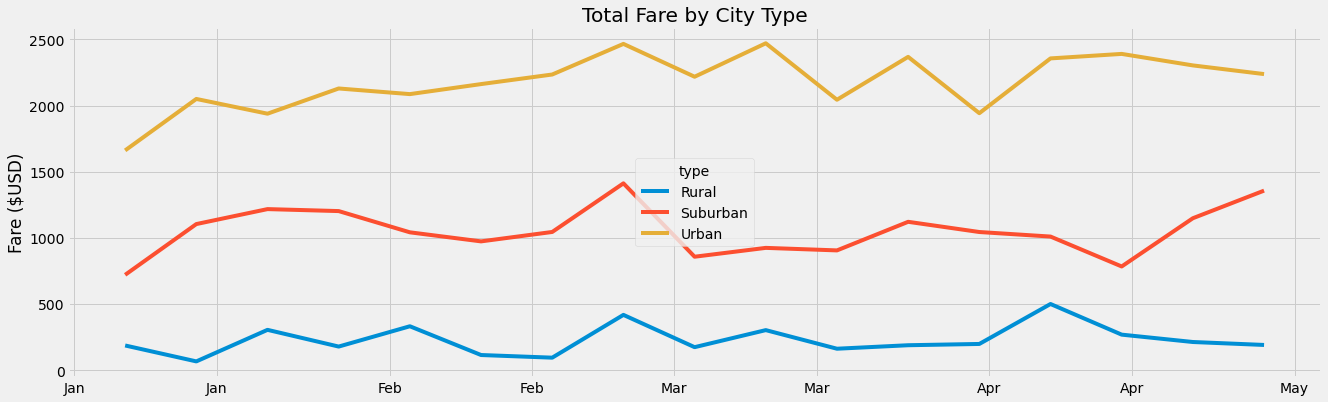

In [20]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
plt.style.use('fivethirtyeight')

fig, df = plt.subplots()
df.plot(date_pivot_sub_week, label=["Rural", "Suburban", "Urban"])

#add title and y-label
plt.title("Total Fare by City Type")
plt.ylabel('Fare ($USD)')

#add legend
plt.legend(loc="center", title = "type")

#set fig size
plt.gcf().set_size_inches(20, 6)

#import date formatting contingencies
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

# Define the date format
date_form = DateFormatter("%b")
df.xaxis.set_major_formatter(date_form)

# Save Figure
plt.savefig("analysis/PyBer_fare_summary.png")

# Show Figure
plt.show()